In [1]:
%matplotlib inline

In [2]:
# import dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
# files to be read
# NOTE TO SELF, resources before the file name.

ride_data_file = os.path.join('Resources' , 'ride_data.csv')
city_data_file = os.path.join('Resources' , 'city_data.csv')

In [4]:
# create dataframes
ride_data_df = pd.read_csv(ride_data_file)
city_data_df = pd.read_csv(city_data_file)

In [5]:
# checking if there are missing values
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [6]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
city_data_df['driver_count'].dtype

dtype('int64')

In [8]:
cities = city_data_df['city'].tolist()
cities = set(cities)
print(len(cities))

120


In [9]:
# merge the dataframes
# the how parameter here is new to me
# the output of a merge with and without are somewhat visually different
city_ride_df = pd.merge(ride_data_df , city_data_df ,how="left", on=["city" ,"city"])

In [10]:
city_ride_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [11]:
city_types =set( city_ride_df['type'].tolist())
city_types


{'Rural', 'Suburban', 'Urban'}

In [16]:
# dataframes for the types of cities
rural_df = city_ride_df[city_ride_df['type'] == 'Rural']

suburban_df = city_ride_df[city_ride_df['type'] == 'Suburban']

urban_df = city_ride_df[city_ride_df['type'] == 'Urban']

In [17]:
# total ride counts per city types
rural_total_ride = rural_df['ride_id'].count()
suburban_total_ride = suburban_df['ride_id'].count()
urban_total_ride = urban_df['ride_id'].count()


In [21]:
# get the no. of rides in the cities per city type
rural_cityride_ct = rural_df.groupby(['city']).count()['ride_id']
suburban_cityride_ct = suburban_df.groupby(['city']).count()['ride_id']
urban_cityride_ct = urban_df.groupby(['city']).count()['ride_id']


In [23]:
# get the average fare per city in the three city types
avg_rural_fare = rural_df.groupby(['city']).mean()['fare']
avg_suburban_fare = suburban_df.groupby(['city']).mean()['fare']
avg_urban_fare = urban_df.groupby(['city']).mean()['fare']


In [24]:
# get the average no. of drivers per city in the three city types
avg_rdriver_count = rural_df.groupby(['city']).mean()['driver_count']
avg_sdriver_count = suburban_df.groupby(['city']).mean()['driver_count']
avg_udriver_count = urban_df.groupby(['city']).mean()['driver_count']

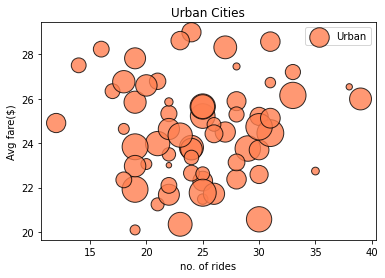

In [30]:
# plot the graphs no.of rides on x,  avg fare on y
fig , ax = plt.subplots()
ax.scatter(urban_cityride_ct, 
           avg_urban_fare,
           label='Urban',
           s=10*avg_udriver_count,
          c = 'coral',
           edgecolor='black',
           linewidth=1,
           alpha=0.8
          )
ax.set_xlabel('no. of rides')
ax.set_ylabel('Avg fare($)')
ax.set_title('Urban Cities')
ax.legend()
plt.show()